Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [83]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [85]:
# Split for validate creation
train, val = train_test_split(train, random_state=42)

Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.

In [86]:
import numpy as np

In [87]:
def wrangle (df):
    # Prevent warning
    df = df.copy()
    
    # Date time conversion
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])
    df['date_recorded_year'] = df['date_recorded'].dt.year
    df['date_recorded_month'] = df['date_recorded'].dt.month
    df['date_recorded_day'] = df['date_recorded'].dt.day
    
    # Deal with outliers
#     df['population'] = 
#     df['num_private'] = might as well be tossed if all non-zeros are trimmed
#     df['amount_tsh'] = 
    
    # Fix zeros
    def fix_zeros (col):
        df[col][df[col]==0] = np.NaN
    
    fix_zeros('longitude')
    fix_zeros('latitude')
    fix_zeros('construction_year')
    fix_zeros('gps_height')
    
    # select dropped cols and return
    drops = ['date_recorded','id','recorded_by', 'wpt_name']
    return df.drop(columns=drops)

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)
test_wrangled = wrangle(test)

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
train_wrangled.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,date_recorded_year,date_recorded_month,date_recorded_day
count,44550.000000,29290.000000,43211.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,29087.000000,44550.000000,44550.000000,44550.000000
mean,326.361114,1016.187060,35.155256,-5.707581e+00,0.515376,15.366846,5.651291,178.793333,1996.833224,2011.922334,4.372593,15.647677
std,3291.640548,613.847692,2.611005,2.941883e+00,13.633690,17.696176,9.690341,471.050949,12.461426,0.957576,3.030839,8.681077
min,0.000000,-63.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000,2004.000000,1.000000,1.000000
25%,0.000000,387.000000,33.276946,-8.529283e+00,0.000000,5.000000,2.000000,0.000000,1988.000000,2011.000000,2.000000,8.000000
50%,0.000000,1165.000000,35.014087,-5.022018e+00,0.000000,12.000000,3.000000,25.000000,2000.000000,2012.000000,3.000000,16.000000
75%,20.000000,1498.000000,37.239285,-3.327652e+00,0.000000,17.000000,5.000000,211.750000,2008.000000,2013.000000,7.000000,23.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2013.000000,12.000000,31.000000


In [89]:
train['num_private'][train['num_private']>0]

45425    755
51043      6
26873      6
14081      1
22008      3
        ... 
55439     50
21518     65
56537     17
22002     20
48190      7
Name: num_private, Length: 579, dtype: int64

In [90]:
import matplotlib.pyplot as plt

C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


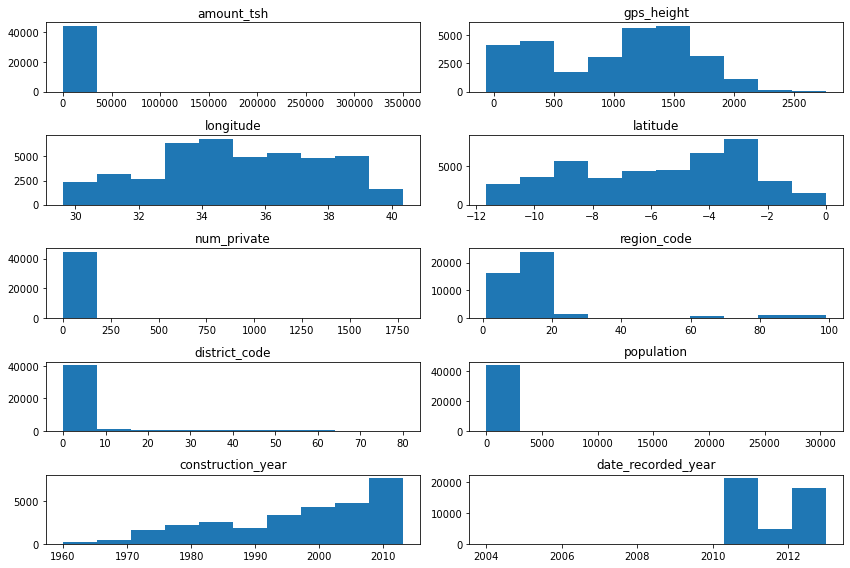

In [91]:
fig, axs = plt.subplots(5,2)
col = 0
cols = train_wrangled.describe().columns
for ax_row in axs:
    for ax in ax_row:
        fig.sca(ax)
        plt.hist(train_wrangled[cols[col]])
        ax.set_title(cols[col])
        col+=1
fig.tight_layout(rect=(0,0,2,2))
#Need to drop id, fix zero long + lat, fix zero in Construction year, trim outliers in population, num_private

In [92]:
train.describe(include='object').loc['unique']
#drop recorded_by, wpt_name

date_recorded              349
funder                    1644
installer                 1860
wpt_name                 29076
basin                        9
subvillage               16671
region                      21
lga                        125
ward                      2071
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2494
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
Name: unique, dtype: object

In [93]:
target = 'status_group'
feature = set(train_wrangled.columns) - set([target])
X_train = train_wrangled[feature]
y_train = train_wrangled[target]
X_val = val_wrangled[feature]
y_val = val_wrangled[target]

 Try Ordinal Encoding.  
 Try a Random Forest Classifier.

In [94]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [95]:
pipeline = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestClassifier(n_estimators=50,min_samples_leaf=5))

In [96]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['scheme_management', 'management_group',
                                      'funder', 'region', 'quantity_group',
                                      'permit', 'water_quality', 'quantity',
                                      'source_type', 'subvillage', 'ward',
                                      'scheme_name', 'waterpoint_type',
                                      'waterpoint_type_group', 'payment_type',
                                      'source', 'lga', 'extraction_type_class',
                                      'installer', 'payment', 'basin'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                            

In [97]:
pipeline.score(X_val,y_val)

0.8035016835016835

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,pipeline.predict_proba(X_val),multi_class='ovo')

0.8852607039047106

In [99]:
y_test = pipeline.predict(test_wrangled)

In [100]:
y_test = pd.DataFrame({'id':sample_submission['id'].tolist(), 'status_group':y_test.tolist()})

In [101]:
y_test.head()

,id,status_group
0,50785,non functional
1,51630,non functional
2,17168,non functional
3,45559,non functional
4,49871,non functional


In [103]:
y_test.to_csv('predictions.csv',index=False)

 Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue Submit Predictions button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
 Commit your notebook to your fork of the GitHub repo.